In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np


In [50]:
documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [51]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [59]:
df

,100,app,belly,best,came,cat,chrome,climbing,eating,extension,...,photo,play,promoter,restaurant,smiley,squooshy,tab,taken,translate,ve
0,0.00000,0.000000,0.000000,0.000000,0.408248,0.000000,0.00000,0.000000,0.408248,0.00000,...,0.000000,0.408248,0.00000,0.408248,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.461149,0.386479,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.461149,0.00000,0.000000,0.000000,0.000000
2,0.00000,0.542162,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.542162,0.000000
3,0.43025,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.43025,0.000000,0.43025,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.399323,0.000000,0.399323,0.00000,0.000000,0.000000,0.00000,...,0.476474,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.476474,0.000000,0.476474
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.509814,0.00000,0.608313,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.47662,0.000000,0.000000,0.47662,...,0.000000,0.000000,0.47662,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000


In [21]:
true_k = 2
clf = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
data = clf.fit(X)
centroids = clf.cluster_centers_

In [27]:
centroids

array([[0.        , 0.        , 0.11528728, 0.19645038, 0.10206207,
        0.22728412, 0.        , 0.15207829, 0.10206207, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.11528728, 0.10206207, 0.10206207, 0.        ,
        0.11528728, 0.15207829, 0.        , 0.11911855, 0.10206207,
        0.        , 0.10206207, 0.        , 0.11528728, 0.        ,
        0.11911855, 0.        , 0.11911855],
       [0.10756238, 0.13554052, 0.        , 0.        , 0.        ,
        0.        , 0.11915496, 0.        , 0.        , 0.11915496,
        0.10756238, 0.13554052, 0.31564425, 0.13554052, 0.13554052,
        0.11915496, 0.        , 0.        , 0.        , 0.13554052,
        0.        , 0.        , 0.10756238, 0.        , 0.        ,
        0.11915496, 0.        , 0.10756238, 0.        , 0.10756238,
        0.        , 0.13554052, 0.        ]])

In [24]:
print("Top terms per cluster:")
order_centroids = clf.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = clf.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = clf.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
Cluster 1:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome


Prediction
[1]
[0]


In [41]:
X

<8x33 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [25]:
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 1

[[ 3.6631272e+03  3.0814879e-33]
 [-3.6631272e+03  3.0814879e-33]]


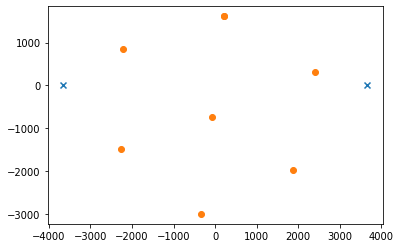

In [39]:
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model.fit_transform(centroids)
transformed_words = model.fit_transform(X.toarray())
print(transformed_centroids)
plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.scatter(transformed_words[:, 0], transformed_words[:, 1], marker='o')
# plot individual data points
plt.show()

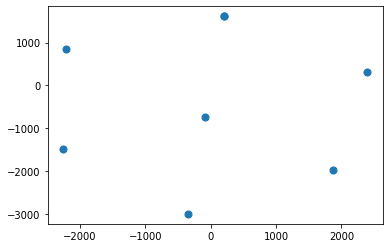

In [54]:
X = X.toarray()
plt.scatter(transformed_words[:, 0], transformed_words[:, 1], s=50);

In [53]:
transformed_words

array([[ 1864.7766 , -1959.379  ],
       [ -342.67072, -2988.2036 ],
       [  209.89017,  1611.3716 ],
       [  -81.50892,  -733.97614],
       [-2220.8223 ,   856.26434],
       [-2263.4595 , -1481.6752 ],
       [  209.89017,  1611.3716 ],
       [ 2397.2395 ,   315.0256 ]], dtype=float32)

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(transformed_words)
y_kmeans = kmeans.predict(transformed_words)

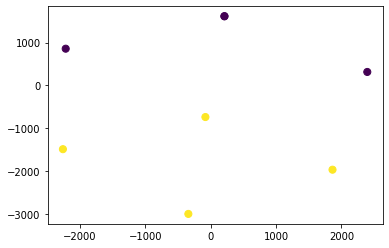

In [57]:
plt.scatter(transformed_words[:, 0], transformed_words[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [58]:
y_kmeans

array([1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)